<center> <h2> Data Content Exploration </h2> </center>
    
###  I. Data Source

The data was downloaded from the Kaggle website (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). 
It was provided by Clément Bisaillon who acknowledged the following sources:

> Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018

> Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).


### II. Loading the data

In [1]:
import random
import pandas as pd
import numpy as np
from utils.utils_display import load_data, display_random_article

In [2]:
filepath = './data/rawdata/'
data = load_data(filepath)
del data['subject']
del data['date']

In [3]:
data.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


In [29]:
display_random_article(data)

**Title:** Trump versus Jeb in New Hampshire on day before crucial primary

**Label:** True

**Text:** MANCHESTER, N.H. (Reuters) - White House hopefuls Donald Trump and Jeb Bush opened political hostilities on Monday as Republican and Democratic candidates stormed across New Hampshire in a final flurry of events before the state’s crucial first-in-the-nation primary. The stage was set for the vote on Tuesday, with New York billionaire Trump enjoying a big lead in opinion polls of the state’s Republican voters and a host of rivals jockeying to emerge as his chief challenger for the Republican presidential nomination in the Nov. 8 election. In the race for the Democratic nomination, Senator Bernie Sanders from neighboring Vermont sought to hang on for a much-needed victory over former Secretary of State Hillary Clinton a week after a razor-thin loss to her in the Iowa caucuses. Sanders told a crowd of about 500 people in Nashua that his call to eradicate income inequality and level the economic playing field for lower- and middle-class workers was resonating. “I’m here today to ask your ... (*max_characters* = 1000)

### III. Text preprocessing

Main steps in text processing detailed in utils_text.py

In [5]:
import nltk
from utils.utils_text import transform

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
text = random.choice(data['text'])[:1000]

In [7]:
print(text)

ROME (Reuters) - Italy s anti-establishment 5-Star Movement pummeled a center-right coalition to govern Ostia, one of Rome s largest neighborhoods, in a run-off vote that confirms the 5-Star s strength months away from a national election. Five-Star s Giuliana Di Pillo took 60 percent of the vote, doubling her first-round result, against 40 percent for the center-right s Monica Picca in a closely watched contest that comes just months before a national election. The result shows the legal troubles that have plagued the administration of Rome s 5-Star mayor, Virginia Raggi, since her election in June of last year have not dampened the maverick party s popularity in the capital.  There is a Raggi effect and it s positive,  Luigi Di Maio, the 5-Star prime minister candidate, wrote on Twitter.  In Rome we continue to win even against a coalition of five center-right forces.  The 5-Star is Italy s most-popular party ahead of a national vote due between March and May, while the ruling Democr

In [8]:
print(transform(text))

['rome', 'reuters', 'italy', 'anti', 'establishment', 'digit_token', 'star', 'movement', 'pummeled', 'center', 'right', 'coalition', 'govern', 'ostia', 'one', 'rome', 'largest', 'neighborhood', 'run', 'vote', 'confirms', 'digit_token', 'star', 'strength', 'month', 'away', 'national', 'election', 'five', 'star', 'giuliana', 'di', 'pillo', 'took', 'digit_token', 'percent', 'vote', 'doubling', 'first', 'round', 'result', 'digit_token', 'percent', 'center', 'right', 'monica', 'picca', 'closely', 'watched', 'contest', 'come', 'month', 'national', 'election', 'result', 'show', 'legal', 'trouble', 'plagued', 'administration', 'rome', 'digit_token', 'star', 'mayor', 'virginia', 'raggi', 'since', 'election', 'june', 'last', 'year', 'dampened', 'maverick', 'party', 'popularity', 'capital', 'raggi', 'effect', 'positive', 'luigi', 'di', 'maio', 'digit_token', 'star', 'prime', 'minister', 'candidate', 'wrote', 'twitter', 'rome', 'continue', 'win', 'even', 'coalition', 'five', 'center', 'right', 'fo

#### Processing Dataframe

In [9]:
def processing_text_df(block):
    fulltext = " ".join(block)
    return " ".join(transform(fulltext))

def get_indices(N, proportions):
    assert sum(proportions) == 1
    indices = np.random.choice(N, replace = False, size = N)
    ind1 = int(N*proportions[0])
    ind2 = int(N*proportions[0]) + int(N*proportions[1])
    return indices[:ind1], indices[ind1:ind2], indices[ind2:]

In [10]:
# Slow operation will save dataframe for future use.
# data['processed'] = data[['title','text']].apply(lambda x : processing_text_df(x),axis=1)
# data.head() 

In [11]:
#data.to_csv('./data/cleandata/data.csv',index = False)

In [12]:
#indtrain,indval,indtest = get_indices(len(data),proportions = [0.8,0.1,0.1])

In [13]:
#data.loc[indtrain].to_csv('./cleandata/train.csv',index = False)
#data.loc[indval].to_csv('./cleandata/validation.csv',index = False)
#data.loc[indtest].to_csv('./cleandata/test.csv',index = False)

In [14]:
data = pd.read_csv('./data/cleandata/data.csv')
data.head()

,title,text,label,processed
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True,budget fight loom republican flip fiscal scrip...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True,military accept transgender recruit monday pen...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True,senior republican senator let mr mueller job w...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True,fbi russia probe helped australian diplomat ti...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True,trump want postal service charge much amazon s...


#### Most common words

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from collections import Counter
true = Counter()
fake = Counter()

for sentence,label in zip(data['processed'],data['label']):
    words = sentence.split()
    if label == 'True':
        true.update(words)
    else:
        fake.update(words)

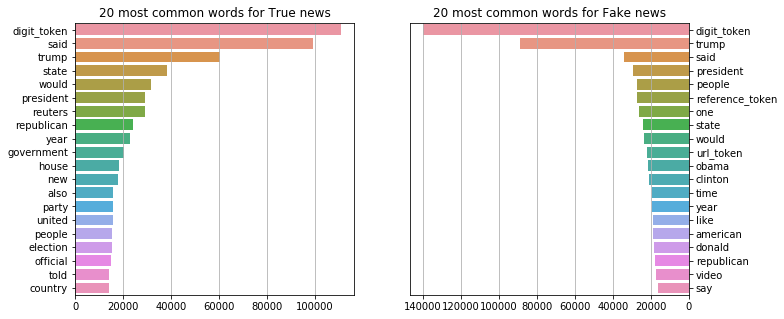

In [17]:
plt.rcParams['figure.figsize']=(11,5)
plt.subplot(1,2,1)
plt.title('20 most common words for True news')
plt.grid(True)
bar1 = sns.barplot(x=np.array(true.most_common(20))[:,1].astype('float32'),y=np.array(true.most_common(20))[:,0])

plt.subplot(1,2,2)
plt.title('20 most common words for Fake news')
plt.grid(True)
bar2 = sns.barplot(x=np.array(fake.most_common(20))[:,1].astype('float32'),y=np.array(fake.most_common(20))[:,0])
bar2.invert_xaxis()
bar2.yaxis.tick_right()
plt.show()
#plt.savefig('./images/barplot_wordcount.pdf',bbox_inches='tight')

#### Feature importance and selection : identitfying important tokens

Here we partly follow the methodology proposed at : https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499

In [18]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
CV = CountVectorizer(max_features=5000,preprocessor=lambda x: x, ngram_range=(1,1))

In [20]:
X = CV.fit_transform(data['processed'])

In [21]:
y = np.array([(lab=='True') * 1 for lab in data['label']])

In [22]:
vocabulary = CV.vocabulary_

In [23]:
scaler = StandardScaler()

In [24]:
selection = SelectFromModel(LogisticRegression(C=0.01, penalty='l1',solver='saga'))
selection.fit(X, y)

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [25]:
decisive_words = np.array(list(vocabulary.keys()))[selection.get_support()]

In [26]:
freq_decisive_words = dict(zip(decisive_words,[vocabulary[key] for key in decisive_words]))
freq_decisive_words = Counter(freq_decisive_words)

In [27]:
sub = np.random.choice(list(freq_decisive_words.keys()),replace=False,size=30)
subselect = np.array([[key,freq_decisive_words[key]] for key in sub])

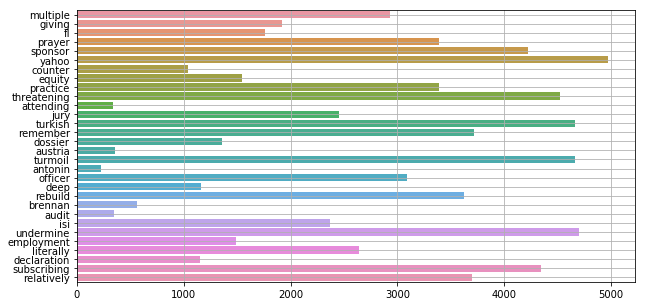

In [28]:
plt.rcParams['figure.figsize']= (10,5)
bar1 = sns.barplot(x=subselect[:,1].astype('float32'),y=subselect[:,0])
plt.grid(True)
plt.show()
#plt.savefig('./images/count_words_decisive.pdf')

#### Fun Plot

The code provided below has been tested. The limit instance at the time of generating the word cloud was not large enough. Hence, we generate the code on our local machine.

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from utils.utils_display import load_data
from collections import Counter
import pandas as pd

In [ ]:
data = pd.read_csv('./data/cleandata/data.csv')

In [ ]:
def remove_token_string(data):
    words = (' '.join(data['processed'])).split()
    return " ".join([word for word in words if '_token' not in word])

In [ ]:
text = remove_token_string(data)

In [ ]:
wordcloud = WordCloud(width=700,height=300,background_color='white').generate(text = text)

In [ ]:
plt.rcParams['figure.figsize'] = (20,10)
plt.imshow(wordcloud)
plt.show()

In [ ]:
wordcloud.to_file('./images/wordcloud.pdf')